# Importing Libraries

In [66]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.pyplot as mp
from matplotlib import rcParams
%matplotlib inline

#  Using Our Data

In [67]:
df = pd.read_csv('survey.csv')

In [68]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


# Data Cleaning

In [69]:
df.isnull().sum() # searching for columns having null values

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [70]:
df[df.duplicated()]  #checking for duplicates

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments


In [71]:
df.drop(columns=['state','comments','Timestamp','no_employees'],inplace=True) #dropping columns 


In [72]:
print(df['self_employed'].unique())

[nan 'Yes' 'No']


In [73]:
print(df['self_employed'].value_counts()) # Counting Data values

No     1095
Yes     146
Name: self_employed, dtype: int64


In [74]:
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' nan]


In [75]:
df['self_employed'].fillna('No',inplace=True) #replacing nan values with "NO"

In [76]:
df['work_interfere'].fillna('Sometimes',inplace=True) #filling nan values of self employed data

In [77]:
print(df['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [78]:


male = ['M', 'Male', 'male', 'm', 'maile', 'Mal', 'Make', 'Male ', 'Man', 'msle', 'Mail', 'Malr','Male-ish','something kinda male?','non-binary','Cis Male','Male (CIS)','Guy (-ish) ^_^','male leaning androgynous','Man','Male ','msle','Mail','cis male','Malr','Cis Man','ostensibly male, unsure what that really means']
female = ['Female', 'female', 'F', 'Woman', 'f', 'Femake', 'woman', 'Female ', 'femail','Trans-female','Cis Female','Woman','Femake','Nah','All','Enby','fluid','Genderqueer','Agender','cis-female/femme','Trans woman','Female (cis)','A little about you','p','femail','Female (trans)','queer/she/they','queer','Neuter','Androgyne']


df['Gender'].replace(to_replace = male, value = 'Male', inplace=True)
df['Gender'].replace(to_replace = female, value = 'Female', inplace=True)


In [79]:
print(df['Gender'].unique())

['Female' 'Male']


In [80]:
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,No,No,Yes,Sometimes,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,United States,No,Yes,Yes,Sometimes,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,United States,No,No,No,Sometimes,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [81]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [82]:
# finding outliers in age 

outlier_1 = (df['Age'] < 18).sum() # people age less that 18
print('People younger than 18: ' + str(outlier_1))
outlier_2 = (df['Age'] > 60).sum()   # prople age more than 60
print('People older than 60: ' + str(outlier_2))
Total_outliers = outlier_1 + outlier_2
print('Total Outliers: ' + str(Total_outliers))


People younger than 18: 6
People older than 60: 6
Total Outliers: 12


# Data Visualization

# Univariate visualizations 

# Bar Chart

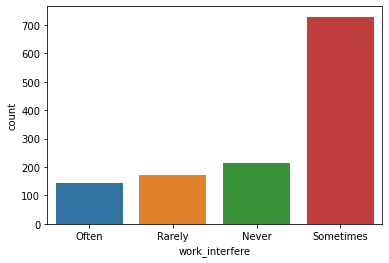

In [83]:
#bar chart for work interfere 
sb.countplot(data=df, x='work_interfere');

# Pie Chart

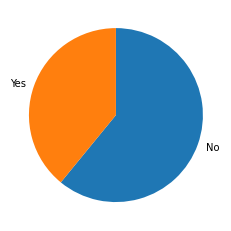

In [84]:
sorted_counts = df['family_history'].value_counts()
gen_percentage = sorted_counts/sorted_counts[:].sum()
plt.pie(gen_percentage, labels = sorted_counts.index, startangle = 90, counterclock = False);

# Histogram

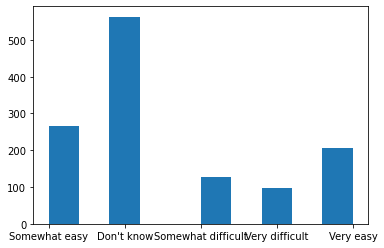

In [85]:
plt.hist(data = df, x = 'leave', bins = 10); #histogram showing if it easy for coworkers to take medical leave for mental health condition

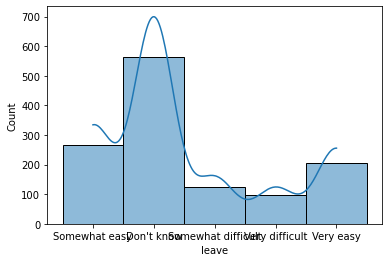

In [86]:
sb.histplot(df['leave'], kde=True); # same histogram with seaborn library

# Box Plot

<AxesSubplot:xlabel='Age'>

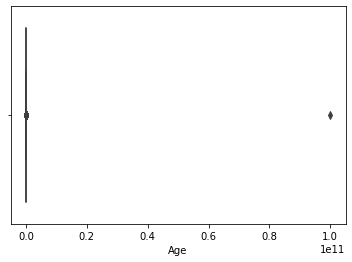

In [87]:
sb.boxplot(df['Age'])

In [88]:
df.drop(df[df['Age'] < 18].index, inplace = True) 
df.drop(df[df['Age'] > 60].index, inplace = True) 

<AxesSubplot:xlabel='Age'>

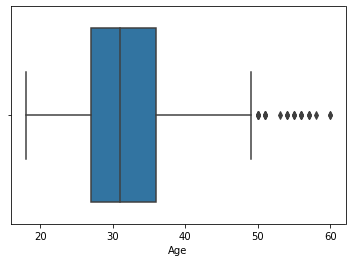

In [89]:
sb.boxplot(df['Age'])

In [90]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [91]:
print(df['Country'].unique())

['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'Georgia'
 'China' 'Czech Republic' 'Philippines']


In [92]:
print(df['phys_health_consequence'].unique())

['No' 'Yes' 'Maybe']


In [93]:
df['Gender'].replace(['Male', 'Female'], [0,1], inplace=True)
df['family_history'].replace(['Yes', 'No'], [0,1], inplace=True)
df['remote_work'].replace(['Yes', 'No'], [0,1], inplace=True)
df['benefits'].replace(['Yes', 'No','Don\'t know'], [0,1,2], inplace=True)
df['work_interfere'].replace(['Often', 'Rarely', 'Never','Sometimes'], [1, 2, 3, 4], inplace=True)
df['care_options'].replace(['Yes', 'No','Not sure'], [0,1,2], inplace=True)
df['obs_consequence'].replace(['Yes', 'No'], [0,1], inplace=True)


# Heat Map

In [94]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

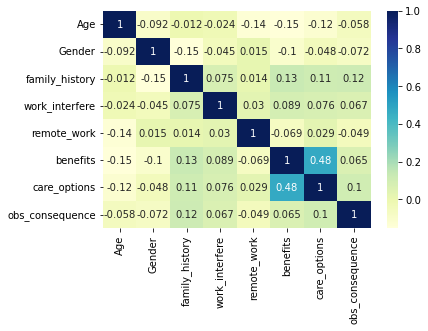

In [95]:
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) # high correlation between care options and benefits

mp.show()

In [96]:

df['Country'].replace(['United States', 'Canada', 'United Kingdom','Bulgaria','France','Portugal','Netherlands','Switzerland','Poland','Australia','Germany','Russia','Mexico','Brazil','Slovenia','Costa Rica','Austria','Ireland','India','South Africa','Italy','Sweden','Colombia','Latvia','Romania','Belgium','New Zealand','Zimbabwe','Spain','Finland','Uruguay','Israel','Bosnia and Herzegovina','Hungary','Singapore','Japan','Nigeria','Croatia','Norway','Thailand','Denmark','Bahamas, The','Greece','Moldova','Georgia','China','Czech Republic','Philippines'], [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48], inplace=True)
df['self_employed'].replace(['Yes', 'No'], [0,1], inplace=True)
df['treatment'].replace(['Yes', 'No'], [0,1], inplace=True)
df['tech_company'].replace(['Yes', 'No'], [0,1], inplace=True)
df['wellness_program'].replace(['Yes', 'No','Don\'t know'], [0,1,2], inplace=True)
df['seek_help'].replace(['Yes', 'No','Don\'t know'], [0,1,2], inplace=True)
df['wellness_program'].replace(['Yes', 'No','Don\'t know'], [0,1,2], inplace=True)
df['anonymity'].replace(['Yes', 'No','Don\'t know'], [0,1,2], inplace=True)
df['leave'].replace(['Somewhat easy', 'Don\'t know', 'Somewhat difficult','Very difficult','Very easy'], [1, 2, 3, 4,5], inplace=True)
df['mental_health_consequence'].replace(['Yes', 'No','Maybe'], [0,1,2], inplace=True)
df['coworkers'].replace(['Yes', 'No','Some of them'], [0,1,2], inplace=True)
df['supervisor'].replace(['Yes', 'No','Some of them'], [0,1,2], inplace=True)
df['mental_health_interview'].replace(['Yes', 'No','Maybe'], [0,1,2], inplace=True)
df['phys_health_interview'].replace(['Yes', 'No','Maybe'], [0,1,2], inplace=True)
df['phys_health_consequence'].replace(['Yes', 'No','Maybe'], [0,1,2], inplace=True)
df['mental_vs_physical'].replace(['Yes', 'No','Don\'t know'], [0,1,2], inplace=True)




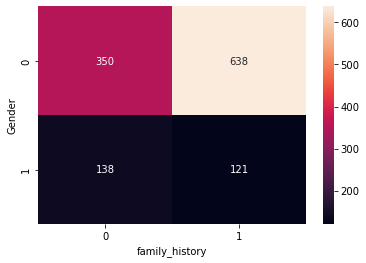

In [97]:
sb.heatmap(pd.crosstab(df.Gender, df.family_history), annot=True, fmt='d'); # family have history in mnental illneas 


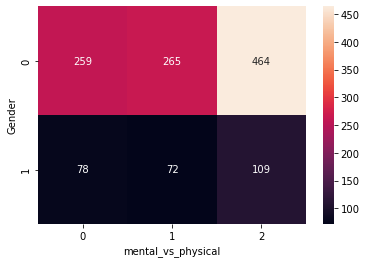

In [98]:
sb.heatmap(pd.crosstab(df.Gender, df.mental_vs_physical), annot=True, fmt='d');  #do you fell that your employer takes mental health as seriosuly as physical health


# Clustered Bar Charts 

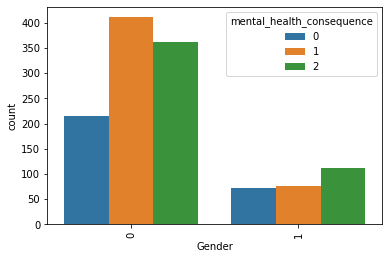

In [99]:
sb.countplot(data = df, x = 'Gender', hue = 'mental_health_consequence') # males think that discussing their mental health problems with their employer would not have negative consequences while females are neutral  
plt.xticks(rotation=90);

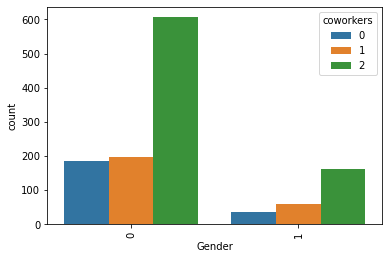

In [100]:
sb.countplot(data = df, x = 'Gender', hue = 'coworkers') #some of both genders  see that they are not willing to discuss mental health problems with their coworkers but most of them or the majority see that some people they can discuss it with 
plt.xticks(rotation=90);

# Model Fitting

In [101]:
X = df.drop(['obs_consequence'], axis=1).copy()
Y = df['obs_consequence'].copy()

In [102]:
X

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,...,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical
0,37,1,1,1,1,0,1,1,0,0,...,0,0,1,1,1,2,0,1,2,0
1,44,0,1,1,1,1,2,1,1,2,...,2,2,2,2,1,1,1,1,1,2
2,32,0,2,1,1,1,2,1,0,1,...,1,2,3,1,1,0,0,0,0,1
3,31,0,3,1,0,0,1,1,0,1,...,1,1,3,0,0,2,1,2,2,1
4,31,0,1,1,1,1,3,0,0,0,...,2,2,2,1,1,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,0,3,1,1,0,4,1,0,1,...,1,2,1,1,1,2,2,1,1,2
1255,32,0,1,1,0,0,1,0,0,0,...,1,0,3,1,1,2,0,1,1,0
1256,34,0,1,1,0,0,4,1,0,0,...,1,2,3,0,0,1,1,1,1,1
1257,46,1,1,1,1,1,4,0,0,1,...,1,2,2,0,1,1,1,1,1,1


In [103]:
Y

0       1
1       1
2       1
3       0
4       1
       ..
1254    1
1255    1
1256    1
1257    1
1258    1
Name: obs_consequence, Length: 1247, dtype: int64

# Linear Regression Model

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [105]:
#fitting using regresssin library

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [106]:
y_pred = regressor.predict(X_test)


In [107]:
y_pred

array([0.80227574, 0.83229891, 0.97200959, 0.89291736, 1.03540008,
       0.74763559, 0.68926108, 1.02192648, 0.8417543 , 0.85868494,
       0.86819384, 0.89604708, 0.70135814, 1.00890563, 0.83378507,
       0.7722677 , 0.64421974, 0.90496158, 0.77722948, 0.71348775,
       0.8766152 , 0.76939707, 0.78233451, 0.74787447, 0.96424467,
       0.64893351, 0.96947907, 0.94012597, 0.86187438, 0.93735124,
       0.96410265, 0.84287714, 0.75631967, 0.74649055, 0.85135135,
       0.694638  , 0.91016772, 0.68065359, 0.89451919, 0.78488944,
       0.91422857, 0.90916067, 0.97633881, 0.9757977 , 0.94615071,
       0.7259333 , 0.83533131, 0.93889708, 1.13920947, 0.92377705,
       1.07877814, 0.64167082, 0.84869349, 0.8163795 , 0.97944638,
       0.94127422, 0.84004963, 0.97072545, 0.92953346, 0.79393152,
       0.9534103 , 0.78825569, 0.75256867, 0.71213123, 0.95041409,
       0.88726424, 0.68251919, 0.96607293, 0.71664421, 0.66889058,
       1.00281515, 0.68881583, 0.7114678 , 0.81533544, 0.82135

In [108]:

from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred)
print("R2 score :", r2)



R2 score : 0.04428256827344246


In [109]:
from sklearn.metrics import mean_squared_error

error_test = np.sqrt(mean_squared_error(Y_test, y_pred))

print('RMSE for test = ',error_test)

RMSE for test =  0.34345674303156876


# Support Vector Machine Model

In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [111]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, Y_train)

SVC()

In [112]:
y_pred_S = classifier.predict(X_test)


In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score
#cm = confusion_matrix(Y_test, y_pred_S)
#print(cm)
accuracy_score(Y_test, y_pred_S)

0.8557692307692307

#  Logistic Regression Model

In [114]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [115]:
y_pred_L = classifier.predict(X_test)


In [116]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(Y_test, y_pred_L))

Accuracy :  0.8509615384615384


# Naive Bayes Model

In [117]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, Y_train)

GaussianNB()

In [118]:
y_pred_N = gnb.predict(X_test)

y_pred_N

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [119]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_N)))

Model accuracy score: 0.8245


# Model Fitting

In [120]:
X_1 = df.drop(['work_interfere'], axis=1).copy()
Y_1 = df['work_interfere'].copy()

In [121]:
X_1

,Age,Gender,Country,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,1,1,1,1,0,1,0,0,2,...,0,1,1,1,2,0,1,2,0,1
1,44,0,1,1,1,1,1,1,2,1,...,2,2,2,1,1,1,1,1,2,1
2,32,0,2,1,1,1,1,0,1,1,...,2,3,1,1,0,0,0,0,1,1
3,31,0,3,1,0,0,1,0,1,0,...,1,3,0,0,2,1,2,2,1,0
4,31,0,1,1,1,1,0,0,0,1,...,2,2,1,1,2,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,0,3,1,1,0,1,0,1,1,...,2,1,1,1,2,2,1,1,2,1
1255,32,0,1,1,0,0,0,0,0,0,...,0,3,1,1,2,0,1,1,0,1
1256,34,0,1,1,0,0,1,0,0,0,...,2,3,0,0,1,1,1,1,1,1
1257,46,1,1,1,1,1,0,0,1,0,...,2,2,0,1,1,1,1,1,1,1


In [122]:
Y_1

0       1
1       2
2       2
3       1
4       3
       ..
1254    4
1255    1
1256    4
1257    4
1258    4
Name: work_interfere, Length: 1247, dtype: int64

# Linear Regression

In [123]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y_1, test_size = 1/3, random_state = 0)

In [124]:
#fitting using regresssin library

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_1, Y_train_1)

LinearRegression()

In [125]:
y_pred_1 = regressor.predict(X_test_1)


In [126]:
y_pred_1

array([3.08249739, 3.07587965, 3.33562513, 3.64646937, 3.24742326,
       2.99273542, 2.86361557, 3.50579135, 3.1259886 , 3.57674175,
       3.20855344, 3.54205143, 3.16796896, 3.33040978, 3.11661047,
       3.1513176 , 2.96292411, 3.47490185, 2.93952238, 3.21474735,
       3.53610596, 3.49019091, 2.99747043, 2.99949317, 3.32235556,
       2.84028004, 3.54494756, 3.41349629, 3.18960938, 3.54224393,
       3.38595333, 2.97911577, 3.52697666, 3.1514537 , 2.96950436,
       3.07622834, 2.91960957, 3.07096558, 3.14348173, 3.11985966,
       3.10568356, 2.99261085, 3.55304502, 3.52116513, 3.37223407,
       2.95356182, 2.73729433, 3.52902709, 3.28518352, 2.66337208,
       3.42575   , 3.09755629, 3.66518761, 3.0198862 , 3.69464938,
       2.78170733, 3.35242865, 3.44451483, 3.16727037, 3.49439146,
       3.64708063, 3.71362991, 3.05128398, 3.08532696, 3.52342856,
       3.17861548, 3.07597646, 3.48879496, 3.18258002, 2.98481309,
       3.62465595, 2.87777906, 3.46669522, 3.25464677, 3.58088

In [127]:

from sklearn.metrics import r2_score

r2_1 = r2_score(Y_test_1, y_pred_1)
print("R2 score :", r2_1)



R2 score : 0.018853796759374375


In [128]:
from sklearn.metrics import mean_squared_error

error_test = np.sqrt(mean_squared_error(Y_test_1, y_pred_1))

print('RMSE for test = ',error_test)

RMSE for test =  1.0719795007460895


# Support Vector Machine Model

In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_1 = sc.fit_transform(X_train_1)
X_test_1 = sc.transform(X_test_1)

In [130]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_1, Y_train_1)

SVC()

In [131]:
y_pred_S_1 = classifier.predict(X_test_1)


In [132]:
y_pred_S_1

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(Y_test_1, y_pred_S_1)

0.5697115384615384

# Logistic Regression Model

In [134]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_1, Y_train_1)

LogisticRegression(random_state=0)

In [135]:
y_pred_L_1 = classifier.predict(X_test_1)


In [136]:
y_pred_L_1

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,

In [137]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(Y_test_1, y_pred_L_1))

Accuracy :  0.5480769230769231


# Naive Bayes Model

In [138]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_1, Y_train_1)

GaussianNB()

In [139]:
y_pred_N_1 = gnb.predict(X_test_1)

y_pred_N_1

array([4, 4, 3, 3, 4, 4, 1, 3, 2, 3, 4, 4, 2, 4, 4, 1, 1, 3, 4, 4, 4, 4,
       4, 4, 3, 2, 3, 4, 4, 3, 4, 2, 4, 4, 4, 1, 4, 4, 4, 4, 3, 4, 3, 3,
       4, 2, 1, 3, 3, 2, 3, 4, 4, 4, 3, 2, 3, 3, 4, 4, 3, 4, 4, 1, 4, 2,
       1, 3, 4, 2, 3, 1, 4, 4, 3, 3, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 2,
       4, 4, 1, 3, 4, 3, 3, 2, 3, 4, 3, 3, 2, 3, 2, 1, 3, 3, 3, 3, 4, 3,
       4, 4, 3, 4, 4, 4, 3, 4, 1, 4, 2, 4, 1, 4, 2, 3, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 2, 2, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 4, 3, 4, 2, 4,
       1, 2, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 1, 4, 3, 3, 4, 3, 1, 4, 2, 2,
       2, 3, 3, 4, 4, 4, 2, 2, 4, 2, 1, 3, 2, 4, 3, 4, 3, 1, 4, 4, 4, 1,
       3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 4, 1, 4, 2, 4, 4, 4, 3, 4,
       4, 1, 4, 2, 4, 1, 3, 4, 4, 4, 4, 3, 4, 4, 4, 1, 4, 4, 3, 2, 4, 4,
       4, 3, 4, 1, 4, 4, 4, 4, 4, 2, 4, 3, 3, 3, 4, 4, 3, 3, 3, 1, 3, 4,
       1, 4, 1, 3, 4, 4, 3, 3, 4, 4, 4, 2, 4, 1, 4, 4, 2, 4, 2, 4, 1, 4,
       4, 4, 2, 3, 2, 4, 3, 3, 3, 4, 4, 3, 2, 4, 4,

In [140]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test_1, y_pred_N_1)))

Model accuracy score: 0.4519
